In [ ]:
import pandas as pd
import cv2 
import tensorflow
import os
import math

Dividing the data into train, test and validation

In [ ]:
#I divided it before so i can't divide  itagain
import os
import shutil
from sklearn.model_selection import train_test_split

# Updated Configuration - CHANGE THESE PATHS!
SOURCE_DIR = 'pic'  # Changed from 'raw_data' to 'pic' based on your error
DEST_DIR = 'data'
CLASSES = ['benign', 'malignant']
SPLIT_RATIOS = (0.7, 0.15, 0.15)  # Train, Val, Test

def create_directory_structure():
    """Create empty directory structure"""
    for split in ['train', 'val', 'test']:
        for cls in CLASSES:
            path = os.path.join(DEST_DIR, split, cls)
            os.makedirs(path, exist_ok=True)
            print(f'Created: {path}')

def split_and_copy():
    """Split data and copy to destination directories"""
    for cls in CLASSES:
        class_path = os.path.join(SOURCE_DIR, cls)
        
        # Verify source directory exists
        if not os.path.exists(class_path):
            raise FileNotFoundError(f"Directory not found: {class_path}. Please check your SOURCE_DIR configuration.")
            
        # Get list of files for current class
        files = [f for f in os.listdir(class_path) 
                if os.path.isfile(os.path.join(class_path, f))]
        print(f'\nProcessing {cls}: {len(files)} images in {class_path}')
        
        # Split into train, temp (val+test)
        train_files, temp_files = train_test_split(
            files,
            test_size=SPLIT_RATIOS[1] + SPLIT_RATIOS[2],
            random_state=42
        )
        
        # Split temp into val and test
        val_files, test_files = train_test_split(
            temp_files,
            test_size=SPLIT_RATIOS[2]/(SPLIT_RATIOS[1]+SPLIT_RATIOS[2]),
            random_state=42
        )
        
        # Copy files to destination
        def copy_files(files, split):
            src_dir = os.path.join(SOURCE_DIR, cls)
            dst_dir = os.path.join(DEST_DIR, split, cls)
            for f in files:
                shutil.copy(os.path.join(src_dir, f), dst_dir)
        
        copy_files(train_files, 'train')
        copy_files(val_files, 'val')
        copy_files(test_files, 'test')
        
        print(f'Train: {len(train_files)}')
        print(f'Val: {len(val_files)}')
        print(f'Test: {len(test_files)}')

def verify_splits():
    """Verify final distribution"""
    print('\nFinal verification:')
    for split in ['train', 'val', 'test']:
        total = 0
        for cls in CLASSES:
            count = len(os.listdir(os.path.join(DEST_DIR, split, cls)))
            total += count
            print(f'{split}/{cls}: {count}')
        print(f'Total {split}: {total}\n')

if __name__ == '__main__':
    # Create empty directory structure
    create_directory_structure()
    
    # Split and copy files
    split_and_copy()
    
    # Verify results
    verify_splits()

Created: data\train\benign
Created: data\train\malignant
Created: data\val\benign
Created: data\val\malignant
Created: data\test\benign
Created: data\test\malignant


FileNotFoundError: Directory not found: pic\benign. Please check your SOURCE_DIR configuration.

In [ ]:



SOURCE_DIR = r'C:\Users\hatem\codes\breast cancer detection for course project\pic'
DEST_DIR = r'C:\Users\hatem\codes\breast cancer detection for course project\data'
CLASSES = ['benign', 'malignant']
SPLIT_RATIOS = (0.7, 0.15, 0.15)  # Train, Val, Test

def create_directory_structure():
    """Create empty directory structure"""
    for split in ['train', 'val', 'test']:
        for cls in CLASSES:
            path = os.path.join(DEST_DIR, split, cls)
            os.makedirs(path, exist_ok=True)
            print(f'Created: {path}')

def split_and_copy():
    """Split data and copy to destination directories"""
    for cls in CLASSES:
        class_path = os.path.join(SOURCE_DIR, cls)
        
        #
        if not os.path.exists(class_path):
            print(f"𝗘𝗥𝗥𝗢𝗥: Missing directory {class_path}")
            print(f"Current working directory: {os.getcwd()}")
            print("Full path attempted:", os.path.abspath(class_path))
            raise SystemExit(1)
            
        # Get list of files
        files = [f for f in os.listdir(class_path) 
                if os.path.isfile(os.path.join(class_path, f))]
        print(f'\nProcessing {cls}: {len(files)} images')
        
        # Split files
        train_files, temp_files = train_test_split(
            files, test_size=0.3, random_state=42  # 30% for val+test
        )
        val_files, test_files = train_test_split(
            temp_files, test_size=0.5, random_state=42  # Split 30% into 15% val + 15% test
        )
        
        # Copy files
        def copy_files(files, split):
            src = os.path.join(SOURCE_DIR, cls)
            dst = os.path.join(DEST_DIR, split, cls)
            for f in files:
                shutil.copy(os.path.join(src, f), dst)
        
        copy_files(train_files, 'train')
        copy_files(val_files, 'val')
        copy_files(test_files, 'test')

def verify_splits():
    """Verify final distribution"""
    print('\nVerification:')
    for split in ['train', 'val', 'test']:
        print(f'\n{split.upper()}:')
        for cls in CLASSES:
            path = os.path.join(DEST_DIR, split, cls)
            count = len(os.listdir(path))
            print(f'{cls}: {count} images')

if __name__ == '__main__':
    create_directory_structure()
    split_and_copy()
    verify_splits()

Created: C:\Users\hatem\codes\breast cancer detection for course project\data\train\benign
Created: C:\Users\hatem\codes\breast cancer detection for course project\data\train\malignant
Created: C:\Users\hatem\codes\breast cancer detection for course project\data\val\benign
Created: C:\Users\hatem\codes\breast cancer detection for course project\data\val\malignant
Created: C:\Users\hatem\codes\breast cancer detection for course project\data\test\benign
Created: C:\Users\hatem\codes\breast cancer detection for course project\data\test\malignant
𝗘𝗥𝗥𝗢𝗥: Missing directory C:\Users\hatem\codes\breast cancer detection for course project\pic\benign
Current working directory: c:\Users\hatem\codes\breast cancer detection for course project
Full path attempted: C:\Users\hatem\codes\breast cancer detection for course project\pic\benign


SystemExit: 1

C:\Users\hatem\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3557: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [10]:
# Add this right after the imports
print("\n=== PATH VERIFICATION ===")
print("1. SOURCE_DIR exists?", os.path.exists(SOURCE_DIR))
print("2. Benign folder exists?", os.path.exists(os.path.join(SOURCE_DIR, 'benign')))
print("3. Malignant folder exists?", os.path.exists(os.path.join(SOURCE_DIR, 'malignant')))
print("4. Full benign path:", os.path.abspath(os.path.join(SOURCE_DIR, 'benign')))
print("5. Current working directory:", os.getcwd())  # Corrected line
print("=========================\n")


=== PATH VERIFICATION ===
1. SOURCE_DIR exists? True
2. Benign folder exists? False
3. Malignant folder exists? False
4. Full benign path: C:\Users\hatem\codes\breast cancer detection for course project\pic\benign
5. Current working directory: c:\Users\hatem\codes\breast cancer detection for course project



In [ ]:



SOURCE_DIR = 'pic'  # Contains train/ and val/
DEST_DIR = 'data'   # Will create train/val/test here
CLASSES = ['benign', 'malignant']
SPLIT_RATIOS = (0.7, 0.15, 0.15)  # Train, Val, Test

def create_directory_structure():
    """Create empty directory structure"""
    for split in ['train', 'val', 'test']:
        for cls in CLASSES:
            path = os.path.join(DEST_DIR, split, cls)
            os.makedirs(path, exist_ok=True)
            print(f'Created: {path}')

def collect_and_split():
    """Collect from existing splits and create new test set"""
    for cls in CLASSES:
        # Collect all images from both train and val
        all_images = []
        
        # From original train
        train_src = os.path.join(SOURCE_DIR, 'train', cls)
        all_images += [os.path.join(train_src, f) for f in os.listdir(train_src)]
        
        # From original val
        val_src = os.path.join(SOURCE_DIR, 'val', cls)
        all_images += [os.path.join(val_src, f) for f in os.listdir(val_src)]
        
        print(f'\nTotal {cls} images:', len(all_images))
        
        # Split into new ratios (70% train, 15% val, 15% test)
        train_files, temp_files = train_test_split(
            all_images, 
            test_size=SPLIT_RATIOS[1] + SPLIT_RATIOS[2],
            random_state=42
        )
        
        val_files, test_files = train_test_split(
            temp_files,
            test_size=SPLIT_RATIOS[2]/(SPLIT_RATIOS[1] + SPLIT_RATIOS[2]),
            random_state=42
        )
        
        # Copy to new structure
        def copy_files(files, split):
            for src_path in files:
                fname = os.path.basename(src_path)
                dst_path = os.path.join(DEST_DIR, split, cls, fname)
                shutil.copy(src_path, dst_path)
        
        copy_files(train_files, 'train')
        copy_files(val_files, 'val')
        copy_files(test_files, 'test')
        
        print(f'{cls} split:')
        print(f'- Train: {len(train_files)}')
        print(f'- Val: {len(val_files)}')
        print(f'- Test: {len(test_files)}')

def verify_splits():
    """Verify final distribution"""
    print('\nFinal verification:')
    for split in ['train', 'val', 'test']:
        total = 0
        for cls in CLASSES:
            count = len(os.listdir(os.path.join(DEST_DIR, split, cls)))
            total += count
            print(f'{split}/{cls}: {count}')
        print(f'Total {split}: {total}\n')

if __name__ == '__main__':
    create_directory_structure()
    collect_and_split()
    verify_splits()

Created: data\train\benign
Created: data\train\malignant
Created: data\val\benign
Created: data\val\malignant
Created: data\test\benign
Created: data\test\malignant

Total benign images: 4574
benign split:
- Train: 3201
- Val: 686
- Test: 687

Total malignant images: 4442
malignant split:
- Train: 3109
- Val: 666
- Test: 667

Final verification:
train/benign: 3201
train/malignant: 3109
Total train: 6310

val/benign: 686
val/malignant: 666
Total val: 1352

test/benign: 687
test/malignant: 667
Total test: 1354



Count the images

In [ ]:
 

def count_images(base_path="data"):
    counts = {}
    
    for split in ["train", "val", "test"]:
        counts[split] = {}
        for cls in ["benign", "malignant"]:
            path = os.path.join(base_path, split, cls)
            if os.path.exists(path):
                num_images = len([f for f in os.listdir(path) 
                                if os.path.isfile(os.path.join(path, f))])
                counts[split][cls] = num_images
            else:
                counts[split][cls] = 0
                
    # Create table
    table = []
    for split in counts:
        row = [split.upper()]
        row.append(counts[split]["benign"])
        row.append(counts[split]["malignant"])
        row.append(sum(counts[split].values()))
        table.append(row)
    
    headers = ["Split", "Benign", "Malignant", "Total"]
    print(tabulate(table, headers=headers, numalign="center", stralign="center"))
    print("\nClass Balance Ratios:")
    for split in counts:
        total = sum(counts[split].values())
        if total > 0:
            ratio = counts[split]["benign"] / counts[split]["malignant"]
            print(f"{split.upper()}: Benign:Malignant = {ratio:.2f}:1")

if __name__ == "__main__":
    count_images()

 Split    Benign    Malignant    Total
-------  --------  -----------  -------
 TRAIN     3201       3109       6310
  VAL      686         666       1352
 TEST      687         667       1354

Class Balance Ratios:
TRAIN: Benign:Malignant = 1.03:1
VAL: Benign:Malignant = 1.03:1
TEST: Benign:Malignant = 1.03:1


Import the required liaberis to do deep learning

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
import cv2
import matplotlib as plt

Assign the variables to the data

In [4]:
batch_size = 64
image_size = 150

train_dir = r'C:\Users\hatem\codes\breast cancer detection for course project\data\train'
validation_dir = r'C:\Users\hatem\codes\breast cancer detection for course project\data\val'
test_dir = r'C:\Users\hatem\codes\breast cancer detection for course project\data\test'

Generate more dato for the model and use VGG16

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=28,
                                   height_shift_range = 0.1,
                                   width_shift_range = 0.1,
                                   shear_range = 0.2 ,
                                   horizontal_flip = True,
                                   zoom_range = 0.3,
                                   fill_mode = 'reflect',
                                   brightness_range=[0.8,1.2]

                                   )

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size = batch_size,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (image_size, image_size),
    batch_size=batch_size,
    class_mode = 'binary'

)

conv_base = VGG16(weights='imagenet', include_top=False,input_shape=(image_size,
                                                                     image_size,3))

conv_base.trainable = False

Found 6310 images belonging to 2 classes.
Found 1352 images belonging to 2 classes.


Giving the model the way to learn

In [ ]:
model2 = models.Sequential()    #Use sequential model in this model
model2.add(conv_base) #Add the convoloution layer 
model2.add(layers.Flatten())#We must flatten the images before entering to model and the pics must be in ONE DIMENSION
model2.add(layers.Dense(512))#We use 512 neural network because it is classification between malignant and benign 
model2.add(layers.Activation('relu'))#Relu is very good to make the data more complex
model2.add(layers.Dropout(0.2))#dropout to aviod the overfit and it is in small amount
model2.add(layers.Dense(1))#1 neural because it choose betweem two outputs only
model2.add(layers.Activation('sigmoid'))#sigmoid is the best one here to select the higher probability between two 



checkpointer = ModelCheckpoint(filepath=r'C:\Users\hatem\codes\breast cancer detection for course project\model.best.keras', monitor='val_loss',
                               save_best_only=True)#Do checkpointer to save the best result model 
early = EarlyStopping(monitor='val_accuracy', min_delta=0.001,patience=5,verbose=1,mode='max',
restore_best_weights=True )#Do early stopping to reduce overfit

model2.compile(optimizer=Adam(learning_rate=1e-4),
               loss='binary_crossentropy',
               metrics=['accuracy'])#Choosing adam for the optimizer and loss is binary bec. it classifies between two

In [7]:
from tensorflow.keras import optimizers


for layer in conv_base.layers[:-1]:
    layer.trainable = False

model2.compile(optimizer=optimizers.Adam(1e-5),loss='binary_crossentropy',
               metrics = ['accuracy'])

history = model2.fit(train_generator,
                     steps_per_epoch=train_generator.samples//train_generator.batch_size,
                     epochs=8,
                     validation_data=validation_generator,
                     validation_steps = validation_generator.samples//train_generator.batch_size,
                     verbose =1,
                     callbacks=[checkpointer,early])    

c:\Users\hatem\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.5704 - loss: 0.6768 - val_accuracy: 0.8028 - val_loss: 0.5106
Epoch 2/8
 1/98 ━━━━━━━━━━━━━━━━━━━━ 2:18 1s/step - accuracy: 0.7656 - loss: 0.5104

c:\Users\hatem\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 368ms/step - accuracy: 0.7656 - loss: 0.5104 - val_accuracy: 0.7999 - val_loss: 0.5097
Epoch 3/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.7388 - loss: 0.5442 - val_accuracy: 0.8229 - val_loss: 0.4546
Epoch 4/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 340ms/step - accuracy: 0.7031 - loss: 0.5391 - val_accuracy: 0.8229 - val_loss: 0.4528
Epoch 5/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.7766 - loss: 0.4864 - val_accuracy: 0.8363 - val_loss: 0.4220
Epoch 6/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 325ms/step - accuracy: 0.8594 - loss: 0.4433 - val_accuracy: 0.8289 - val_loss: 0.4237
Epoch 7/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.7900 - loss: 0.4698 - val_accuracy: 0.8356 - val_loss: 0.4038
Epoch 8/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 334ms/step - accuracy: 0.7500 - loss: 0.4531 - val_accuracy: 0.8363 - val_loss: 0.4023
Restoring model weights from the end of the best epoch: 5.


In [11]:
model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(512))
model2.add(layers.Activation('relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(1))
model2.add(layers.Activation('sigmoid'))



checkpointer = ModelCheckpoint(filepath=r'C:\Users\hatem\codes\breast cancer detection for course project\model.best.keras', monitor='val_loss',
                               save_best_only=True)
early = EarlyStopping(monitor='val_accuracy', min_delta=0.001,patience=5,verbose=1,mode='max',
restore_best_weights=True )

model2.compile(optimizer=Adam(learning_rate=1e-4),
               loss='binary_crossentropy',
               metrics=['accuracy'])
history = model2.fit(
    train_generator,
    steps_per_epoch = math.ceil(train_generator.samples / train_generator.batch_size)
,
    epochs = 10,
    validation_data=validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpointer, early]
)

Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.6977 - loss: 0.5665 - val_accuracy: 0.8207 - val_loss: 0.3977
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.7977 - loss: 0.4325 - val_accuracy: 0.8713 - val_loss: 0.3308
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.8405 - loss: 0.3683 - val_accuracy: 0.8743 - val_loss: 0.3102
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.8455 - loss: 0.3479 - val_accuracy: 0.8839 - val_loss: 0.2947
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.8533 - loss: 0.3361 - val_accuracy: 0.8638 - val_loss: 0.3237
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.8558 - loss: 0.3373 - val_accuracy: 0.8847 - val_loss: 0.2886
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.8626 - loss: 0.3127 - val_accuracy: 0.8795 - val_loss: 0.2836
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.8612 - loss: 0.3160 - val_accuracy: 0.8996 - v

90% TEST ACCUARCY!!

In [16]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (image_size, image_size),
    batch_size = 64,
    class_mode = 'binary'

)
test_loss, test_acc = model2.evaluate(test_generator,steps=math.ceil(test_generator.samples//test_generator.batch_size))
print('test acc:',test_acc)
print('test loss',test_loss)

Found 1354 images belonging to 2 classes.


c:\Users\hatem\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9110 - loss: 0.2314
test acc: 0.9055059552192688
test loss 0.24942484498023987


I used the second one because it has better credentails

In [ ]:
model2.save("breast_cancer_modelbest.h5")

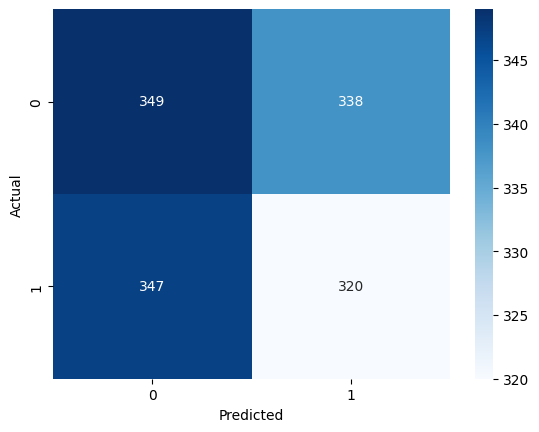

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
